In [2]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3
print('xxx')

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12) 
[Clang 11.0.1 ]
pjr3.py complete
xxx


WE36375
/Users/d3x345/projects/e3sm/scratch/SCM_runs/e3sm_scm_TWP06/run/e3sm_scm_TWP06.eam.h0.2006-01-17-10800.nc
x1 ['2006-01-17T03:00:00.000000000' '2006-01-17T03:30:00.000000000'
 '2006-01-17T04:00:00.000000000' '2006-01-17T04:30:00.000000000'
 '2006-01-17T05:00:00.000000000' '2006-01-17T05:30:00.000000000'
 '2006-01-17T06:00:00.000000000' '2006-01-17T06:30:00.000000000'
 '2006-01-17T07:00:00.000000000' '2006-01-17T07:30:00.000000000'
 '2006-01-17T08:00:00.000000000' '2006-01-17T08:30:00.000000000'
 '2006-01-17T09:00:00.000000000' '2006-01-17T09:30:00.000000000'
 '2006-01-17T10:00:00.000000000' '2006-01-17T10:30:00.000000000'
 '2006-01-17T11:00:00.000000000' '2006-01-17T11:30:00.000000000'
 '2006-01-17T12:00:00.000000000' '2006-01-17T12:30:00.000000000'
 '2006-01-17T13:00:00.000000000' '2006-01-17T13:30:00.000000000'
 '2006-01-17T14:00:00.000000000' '2006-01-17T14:30:00.000000000'
 '2006-01-17T15:00:00.000000000' '2006-01-17T15:30:00.000000000'
 '2006-01-17T16:00:00.000000000' '2006

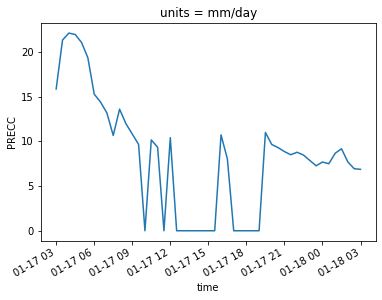

In [3]:
import os
import platform
host = platform.node()
print(host)
resolution = 'low'
if ('sooty' in host):
    if (resolution == 'low'):
        indir = 'x'
    else:
        indir = 'y'
    indir = '/lustre/d3x345/E3SM_prodsims/20210720.F2010.ne30pg2_r05_PJR2b.ne30pg2_r05_oECv3/tests/S_1x10_ndays/run/climo_ne30/20210720.F2010.ne30pg2_r05_PJR2b.ne30pg2_r05_oECv3_ANN_000101_000212_climo.nc'
#    indir = '/home/d3x345/20210720.F2010.ne30pg2_r05_PJR2d.ne30pg2_r05_oECv3_ANN_000101_000212_climo.nc'
else:
    indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')
indir = '/Users/d3x345/projects/e3sm/scratch/SCM_runs/e3sm_scm_TWP06/run/e3sm_scm_TWP06.eam.h0.2006-01-17-10800.nc'
print(indir)
#print('exists',os.path.exists(indir))
DS = xr.open_mfdataset(indir) #.chunk({'time': 20})
#print(DS)
weights = DS.area
weights.name = 'weights'
#print(weights)
#print(weights.sum(),4.*pi)
#Var = DS.FSNT.isel(time=0)
varname = 'FLNT'
LF = DS['LANDFRAC']
OF = DS['OCNFRAC']
IF = DS['ICEFRAC']
Var = DS[varname]
#print(Var)
#Var.plot()
Cloud = DS['CLOUD']
#Cloud.plot(x='time',yincrease=False)
Precc = DS['PRECC']*8.64e7
Precc['units'] = 'mm/day'
Precc.plot()
print('x1',Precc['time'].values)
# the time coord is registered at the end of the time averaging interval
# determine the midpoint of the interval and the length of the interval, 
time = DS['time']
print('time',time.values)
bndname = time.attrs['bounds']
time_bnds = DS[bndname]
tb = time_bnds.values
print('tb',tb)

In [ ]:
indira = '/lustre/d3x345/E3SM_prodsims/20210720.F2010.ne30pg2_r05_PJR2b.ne30pg2_r05_oECv3/tests/S_1x10_ndays/run/*.eam.h0.*.nc'
DSA = xr.open_mfdataset(indira)
print(DSA)


In [ ]:
# the time coord is registered at the end of the time averaging interval
# determine the midpoint of the interval and the length of the interval, 
time = DSA['time']
print('time',time)
bndname = time.attrs['bounds']
time_bnds = DSA[bndname]
tb = time_bnds.values
tint = (tb[:,1]-tb[:,0])
tbm = tint/2. + tb[:,0]


In [ ]:
# reset the time coordinate, and make sure it keeps its original attributes
DSA.coords["time"] = tbm
DSA['time'].attrs['long_name'] = 'time'
DSA['time'].attrs['bounds'] = 'time_bnds'
print(DSA)

In [ ]:
# assuming we are using monthly mean history files
# calculate the number of days per month and convert to a dataarray with same time coord

#print('tttdays',ttt.astype(int))
##print(tint)
#print(tint.shape, type(tint[0]), tint.astype("timedelta64[D]").astype(float)  )
#DSA.coords["days_in_month"]
#DSA.coords["days_in_month"] = tint.astype("timedelta64[D]").astype(int) 
#dpm = xr.DataArray(dims='time',data=DSA['days_in_month'].values)
dpm = xr.DataArray(dims='time',data=tint.astype("timedelta64[D]").astype(int))
dpm = dpm.assign_coords(time=DSA['time'])
print(dpm)

In [ ]:
RESTOM1 = DSA['FSNT'].sel(time='0001') - DSA['FLNT'].sel(time='0001')
RESTOM1 = DSA['FLNT'].sel(time='0001')
RESTOM2 = DSA['FSNT'].sel(time='0002') - DSA['FLNT'].sel(time='0002')
RESTOMA = DSA['FSNT']-DSA['FLNT']
wlocal = weights
RESTOM1G = RESTOM1.weighted(wlocal).mean(dim='ncol')
RESTOM2G = RESTOM2.weighted(wlocal).mean(dim='ncol')
RESTOMAG = RESTOMA.weighted(wlocal).mean(dim='ncol')
print('x1', RESTOMAG.values)
print('Y1', RESTOM1G.weighted(dpm.sel(time='0001')).mean(dim='time').values)
print('Y2', RESTOM2G.weighted(dpm.sel(time='0002')).mean(dim='time').values)
print('YA', RESTOMAG.weighted(dpm).mean(dim='time').values)


In [ ]:
for x in range(5):
    syear = format(x+1, '0004')
    print(syear)
    RESTOM = DSA['FSNT'].sel(time=syear) - DSA['FLNT'].sel(time=syear)
    wlocal = weights
    RESTOMG = RESTOM.weighted(wlocal).mean(dim='ncol')
    print('syear, RESTOMG', syear, RESTOMG.weighted(dpm).mean(dim='time').values)


# debugging stuff

In [ ]:
month_length = DSA.time.dt.days_in_month
month_length

In [ ]:
DSAY = DSA.groupby("time.year")
print(DSAY)
print(DSAY.groups)
year = 1
#print('x1',DSAY[year])
#print('x2',DSAY[year].time.dt.days_in_month)
FLNT = DSAY[year].FLNT
area = DSAY[year].area
dinm = DSAY[year].time.dt.days_in_month
FLNTG = FLNT.weighted(area).mean('ncol')
FLNTGTM = FLNTG.weighted(dinm).mean('time')
print(FLNTGTM.values)

In [ ]:
# checking the selection of times
SWCF1 = DSA['SWCF'].sel(time='0001')
#print(SWCF1)
SWCF2 = DSA['SWCF'].sel(time='0002')
#print(SWCF2)
SWCFA = DSA['SWCF'].sel(time=slice('0001','0003'))
print(SWCFA)

In [ ]:
# checking the effect of correct weighting of days per month
print('dpm',dpm)
print('area wts', type(weights))
SWCFAG = SWCFA.weighted(weights).mean(dim='ncol')
#print(SWCFAG)
print('all months get same weight', SWCFAG.mean().values)
print('weighted by days in month', SWCFAG.weighted(dpm).mean(dim='time').values)


In [ ]:
import os
inCmd='ncdump -h '+indir
outCmd = os.popen(inCmd).read()
print(inCmd)
print(outCmd)

In [ ]:
# understanding datatime behavior
import datetime
import numpy

times = numpy.array([datetime.timedelta(0, 1, 36000)] * 4)
print('xxx',times)
print('x2',times[0])

dt1 = datetime.timedelta(0, 1, 36000)
dt2 = datetime.timedelta(2,2,36000)
dt3 = datetime.timedelta(0,7,3600)

ttt = np.array([dt1,dt2,dt3])
print('d1',dt1.days)
print('d2',dt2.days)
print('d3',dt3.days)
print('ttt',ttt)
ttt.astype("timedelta64[D]").astype(int)